<a href="https://colab.research.google.com/github/hawkilol/8Queens-SHillClimbing-N-Genetic-Algos/blob/main/IA_8Queens_SHillClimbing_genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hill Climbing

------------------------------
Exec: 0
Estado Inicial:  [7, 4, 4, 1, 3, 3, 2, 6]
Achou um solução!
   0   0   0   1   0   0   0   0
   1   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0
   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   1
   0   0   0   0   0   1   0   0
   0   0   1   0   0   0   0   0
   0   0   0   0   0   0   1   0
Melhor Solucao:  [1, 3, 6, 0, 2, 5, 7, 4]
Fitness(melhor solucao):  0
Iteracao de parada 3
------------------------------
------------------------------
Exec: 1
Estado Inicial:  [4, 3, 6, 0, 2, 1, 0, 1]
Achou um solução!
   0   0   0   0   0   0   0   1
   0   0   0   0   0   1   0   0
   0   0   0   1   0   0   0   0
   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   1   0
   0   0   0   0   1   0   0   0
   0   0   1   0   0   0   0   0
   1   0   0   0   0   0   0   0
Melhor Solucao:  [7, 3, 6, 2, 5, 1, 4, 0]
Fitness(melhor solucao):  0
Iteracao de parada 7
------------------------------
------------------------------

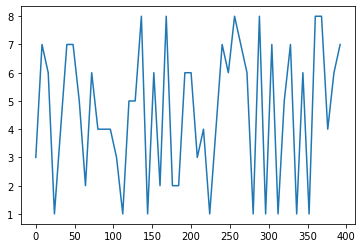

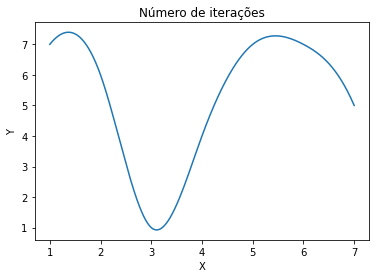

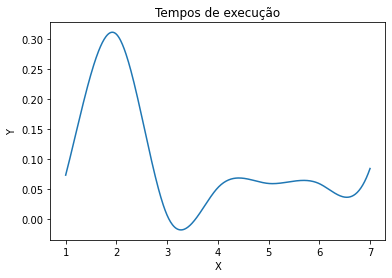

In [ ]:
import random


#faz uma deep copy de um array
def copy(a, b):
    """a = b"""
    for i in range(len(a)):
        a[i] = b[i]


# gera um estado aleatorio a partir de um comprimento (no caso 8)
def randStart(length):
    state = []

    for i in range(length):
        # random.seed(7)
        state.append(random.randrange(0, 8))

    return state


#Converte o arr que representa os estados para um tabuleiro
def stateToBoard(state):
    board = [[0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0]]

    for i in range(len(state)):
        board[state[i]][i] = 1

    return board


# melhor fitness possivel é 0 (minimização)
def fitness(state):
    attacks = 0
    checkQueen = False
    row = 0
    col = 0
    lenState = len(state)
    # Ataques nas linhas
    board = stateToBoard(state)
    for i in range(len(board)):
        for j in range(len(board)):

            if board[i][j]:
                # Ataques nas colunas v
                for n in range(len(board)):
                    if checkQueen:
                        attacks += 1
                    if board[n][j] == 1 and n != i:
                        checkQueen = True

                checkQueen = False

                # Ataques nas linhas h
                for n in range(len(board)):
                    if checkQueen:
                        attacks += 1
                    if board[i][n] == 1 and n != j:
                        checkQueen = True

                checkQueen = False

                # Diagonal de cima da direita
                row, col = i - 1, j + 1
                # >= ou > ?
                while row > 0 and col < lenState:
                    if checkQueen:
                        attacks += 1
                    if board[row][col] == 1:
                        checkQueen = True

                    row, col = row - 1, col + 1
                checkQueen = False

                # Diagonal de cima da esquerda
                row, col = i - 1, j - 1
                while row > 0 and col > 0:
                    if checkQueen:
                        attacks += 1

                    if board[row][col] == 1:
                        checkQueen = True

                    row, col = row - 1, col - 1
                checkQueen = False

                # Diagonal de baixo da direita
                row, col = i + 1, j + 1

                while row < lenState and col < lenState:
                    if checkQueen:
                        attacks += 1
                    if board[row][col] == 1:
                        checkQueen = True

                    row, col = row + 1, col + 1
                checkQueen = False

                # Diagonal de baixo da esquerda
                row, col = i + 1, j - 1

                while row < lenState and col > 0:
                    if checkQueen:
                        attacks += 1
                    if board[row][col] == 1:
                        checkQueen = True

                    row, col = row + 1, col - 1
                checkQueen = False

    return attacks


# retorna o melhor vizinho de um estado
def neighbor(state):
    """retorna o melhor vizinho de um estado"""

    optimalState = state
    optimalFit = fitness(optimalState)  #

    neighborState = [0, 0, 0, 0, 0, 0, 0, 0]
    copy(neighborState, state)

    for i in range(len(state)):
        for j in range(len(state)):

            # Pula a diagonal de posicoes iguais para evitar recalculos
            if j != state[i]:
               
                neighborState[i] = j

                neighborFit = fitness(neighborState)
                #Compara o fitness do vizinho atual
                if neighborFit <= optimalFit:
                    optimalFit = neighborFit
                    copy(optimalState, neighborState)

                # resetando o vizinho para achar um outro na proxima iteração

                neighborState[i] = state[i]

        copy(state, optimalState)

    return state

#realiza o hill climbing estocastico
def hillClimbing(state):
    neighborState = state
    i = 0

    while True:
        i += 1
        
        state = neighborState
        neighborState = neighbor(neighborState)
        
        #Objetivo 0 = sem ataques
        if fitness(state) == 0:
            board = stateToBoard(state)
            
            print("Achou um solução!")
            print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in board]))
            print("Melhor Solucao: ", state)
            print("Fitness(melhor solucao): ", fitness(state))
            print("Iteracao de parada", i)
            
            break



        #caso o algoritmo fique preso em um possivel otimo local
        elif fitness(neighborState) == fitness(state):

            board = stateToBoard(state)

            # Gera um Vizinho aleatorio para tentar escapar de um otimo local
            i = random.randrange(0, 8)
            neighborState[i] = random.randrange(0, 8)



    return fitness(state), i




if __name__ == "__main__":
    
    import time
    import numpy as np
    from scipy.interpolate import make_interp_spline
    import matplotlib.pyplot as plt 
    
    
    listIterations = []
    timesHill = []
    exec = 50
    execs = []
    for i in range(exec):

        #comeco aleatorio
        
        newState = randStart(8)

        print("------------------------------")
        print("Exec:", i)
        print("Estado Inicial: ",newState)
        
        # contabiliza os tempos de exec e iteracoes 
        start_time = time.time()
        fitHillClimbing, iterations = hillClimbing(newState)
        timeHill = (time.time() - start_time)
        timesHill.append(timeHill)
        listIterations.append(iterations)
        execs.append(i)
        

        if fitHillClimbing == 0:
           

            print("------------------------------")

    print("Iteracoes:", listIterations)
    print("Tempos de exec:", execs)
    print("Media de iteracoes: ", np.average(listIterations))
    print("Desvio padrao de iteracoes: ", np.std(listIterations))
    import matplotlib.pyplot as plt
    import numpy as np
  
    # setting the x - coordinates
    x = []
    y = []
    for i in range(len(listIterations)):
        x.append(i *8)


    y = listIterations
    plt.plot(x, y)
    plt.show()
    aux = []
    
    for i in range(len(listIterations)):
      aux.append(i)
    x = np.array(aux)

    #print(x)
   
    y = np.array(listIterations)
   
    #print(y)
    
    model=make_interp_spline(x, y)

    xs=np.linspace(1,7,500)
    ys=model(xs)

    plt.plot(xs, ys)
    plt.title("Número de iterações")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    ##### time
    aux = []
    for i in range(len(listIterations)):
      aux.append(i)
    x = np.array(aux)

    #print(x)
   
    y = np.array(timesHill)
   
  
    #print(y)
    
    model=make_interp_spline(x, y)

    xs=np.linspace(1,7,500)
    ys=model(xs)

    plt.plot(xs, ys)
    plt.title("Tempos de execução")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Algoritmo Genetico

In [ ]:
import random


# Converte um estado de codificação inteira para a codificação binaria
def int_to_bin(stateInt):
    stateBin = []
    for i in stateInt:
        string = f'{i:03b}'
        stateBin.append(string)

    return stateBin


# Converte um estado de codificação binaria para a codificação inteira
def bin_to_int(stateBin):
    stateInt = []
    for i in stateBin:
        stateInt.append(int(i, 2))

    return stateInt
print(bin_to_int(['100', '011', '101', '000', '001', '110', '000', '001']))

# faz uma deep copy de um arr
def copy(a, b):
    """a = b"""
    for i in range(len(a)):
        a[i] = b[i]

    return a


# Realiza mutacao a partir de um estado com valores em binario 
def mutation(stateBin, mutation_rate):
    
    mutatedState = []

    
    for rbin in stateBin:

        rand = random.random()
        #realiza a mutacao dependendo da taxa de mutacao
        if rand <= mutation_rate:

            # Seleciona um bit aleatoriamente para ser flipado

            i = random.randrange(0, (len(rbin) - 1))
            bit = rbin[i]

            if bit == '1':
                
                rbin = list(rbin)

                rbin[i] = '0'
                rbin = ''.join(rbin)
            else:
               
                rbin = list(rbin)
                rbin[i] = '1'
                rbin = ''.join(rbin)

        mutatedState.append(rbin)

    return mutatedState


#realiza o cruzamento a partir de uma lista de estados 
def crossover(parents, crossover_rate):
    # nextGen = []
    p1, p2 = [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]
    successors = []

    for i in range(int(len(parents) / 2)):
        # seleção dos pares de pais
        p1 = copy(p1, parents[2 * i - 1])
        p2 = copy(p2, parents[2 * i])

        rand = random.random()
        # realiza o cruzamento dependendo da taxa de cruzamento
        if rand <= crossover_rate:
            # ponto de corte aleatorio
            cut = random.randrange(0, len(p1) - 1)
            # crossover
            # sucessores 1 e 2
            succ1 = p1[:cut] + p2[cut:]
            succ2 = p2[:cut] + p1[cut:]
            successors.append(succ1)
            successors.append(succ2)
        else:
            successors.append(p1)
            successors.append(p2)
    return successors



# Algortimo genetico que recebe o tamanho da populacao, a taxa de cruzamento e mutacao
def genetic(population_size, crossover_rate, mutation_rate):
    population = []
    
    # Contabiliza as geracoes
    gen = 1
    # inicializa população aleatoria
    for i in range(population_size):
        newState = int_to_bin(randStart(8))
      
        population.append(newState)

    while gen != 1000:
     
        # ordenada de acordo com o fitness
        # seleção de pais
  
        population = population[:population_size]
        population = sorted(population, key=lambda individual: fitness(bin_to_int(individual)))[:population_size]
        

        # o primeiro da lista é o melhor individuo
        bestInd = bin_to_int(population[0])
       
        # calcular o fit só uma vez
        bestFit = fitness(bin_to_int(population[0]))
        # objetivo fit = 0 sem ataques
        if bestFit <= 0:
            board = stateToBoard(bin_to_int(population[0]))
            print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in board]))
            print("Achou um solução!")
            print("Estado: ", population[0])
            # calcular o fit só uma vez
            print("Fitness: ", bestFit)

            break
        else:

            newGen = []
            # elitismo, só 5% da população ou seja os mais adaptados(menor fitness) sobrevivem
            # sobreviventes
            newGen.extend(population[:int((5 * population_size) / 100)])

            sucs = []
            
            # seleciona a população proporcional ao tamanho da populacao
            for i in range(population_size // 5):
                # pre seleciona os pais aleatoriamente por metadade da populacao 
                p1 = random.choice(population[:population_size // 2])
                p2 = random.choice(population[:population_size // 2])
                sucs.append(p1)
                sucs.append(p2)
                #faz o cruzamento dos pais
                newGen.extend(crossover(sucs, crossover_rate))

            mutatedGenes = []

           # pode realizar mutacao para cada sucessor
            for i in newGen:
               mutatedGenes.append(mutation(i, mutation_rate))


            population = mutatedGenes

           
        gen += 1
        #retorna o fitness do melhor individuo, o melhor individuo e a melhor geracao
    return bestFit, population[0], gen


[4, 3, 5, 0, 1, 6, 0, 1]


Retorna os resultados e contabiliza gerações

Retorna A tabela

   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   1   0
   1   0   0   0   0   0   0   0
   0   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   1
   0   0   0   0   0   1   0   0
   0   0   0   1   0   0   0   0
   0   1   0   0   0   0   0   0
Achou um solução!
Estado:  ['010', '111', '011', '110', '000', '101', '001', '100']
Fitness:  0
sucesso!
   1   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0
   0   1   0   0   0   0   0   0
   0   0   0   0   0   1   0   0
   0   0   1   0   0   0   0   0
   0   0   0   0   0   0   1   0
   0   0   0   1   0   0   0   0
   0   0   0   0   0   0   0   1
Achou um solução!
Estado:  ['000', '010', '100', '110', '001', '011', '101', '111']
Fitness:  0
sucesso!
   0   0   0   0   0   1   0   0
   0   0   0   1   0   0   0   0
   0   0   0   0   0   0   0   1
   1   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   1   0
   0   1   0   0   0   0   0   0
   0   0   1   0   0   0   0   

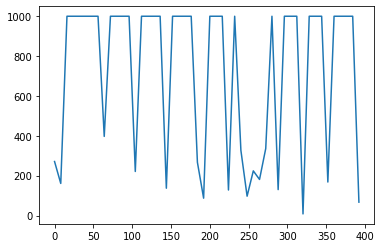

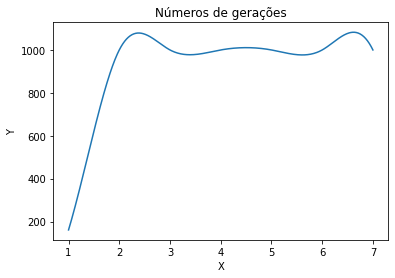

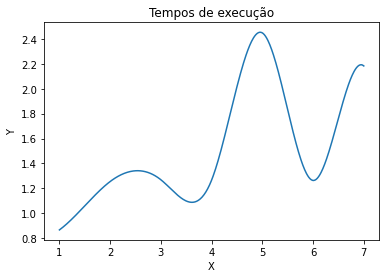

In [ ]:

if __name__ == "__main__":
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.interpolate import make_interp_spline
    import matplotlib.pyplot as plt 
    import time
   
    population_size = 20
    crossover_rate = 0.8
    mutation_rate = 0.3
    fitnessRuns = []
    listIterations = []
    timesHill = []
    gens = []
    
    data = []
   
    table = []
   

    for i in range(50):

        # contabiliza os tempos de exec, as geracoes maximas e os fitness  
        start_time = time.time()
       
        fitRun, bestState, genStop = genetic(population_size, crossover_rate, mutation_rate)
        
        timeHill = (time.time() - start_time)
        board = stateToBoard(bin_to_int(bestState))
        
        data = [i, fitRun, timeHill, genStop, bestState]
        gens.append(genStop)
        table.append(data)
       
        timesHill.append(timeHill)
        fitnessRuns.append(fitRun)
        
        

        if  fitRun == 0:
            print("sucesso!")
    
    
  
    df = pd.DataFrame(table, columns = ["Exec", "F(melhor solucao)", "Tempo exec", "N geracao parada", "melhor solucao"])
    
    print(df)

   
 

    print("Media de fitness: ", np.average(fitnessRuns))
    print("Desvio padrao de fitness: ", np.std(fitnessRuns))
    print("Media de gens: ", np.average(gens))
    print("Desvio padrao de iteracoes: ", np.std(gens))

    
  
    # setting the x - coordinates
    x = []
    y = []
    for i in range(len(gens)):
        x.append(i *8)

   

    #y = np.sin(x)
    y = gens
      
    # plotting the points
    plt.plot(x, y)
      
    # function to show the plot
    plt.show()
    

    
    
  
    aux = []
    for i in range(len(gens)):
      aux.append(i)
    x = np.array(aux)

    #print(x)
   
    y = np.array(gens)
   
    #print(y)
    
    model=make_interp_spline(x, y)

    xs=np.linspace(1,7,500)
    ys=model(xs)

    plt.plot(xs, ys)
    plt.title("Números de gerações")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    ##### time
    aux = []
    for i in range(len(gens)):
      aux.append(i)
    x = np.array(aux)

    #print(x)
   
    y = np.array(timesHill)
   
  
    #print(y)
    
    model=make_interp_spline(x, y)

    xs=np.linspace(1,7,500)
    ys=model(xs)

    plt.plot(xs, ys)
    plt.title("Tempos de execução")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
